In [55]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
import json
import matplotlib.patches as patches
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

In [5]:
# load instances_train2017.json
dataDir='..'
dataType='train2017'
annFile='%s/annotations/instances_%s.json'%(dataDir,dataType)

In [8]:
file =open(annFile,'r')
dataset = json.load(file)
print(type(dataset))

<class 'dict'>


In [9]:
dataset.keys()

dict_keys(['annotations', 'images', 'categories', 'licenses', 'info'])

In [12]:
annotations=dataset['annotations']
images = dataset['images']
categories = dataset['categories']
licenses = dataset['licenses']
info = dataset['info']

In [69]:
annotations[0]

{'area': 2765.1486500000005,
 'bbox': [199.84, 200.46, 77.71, 70.88],
 'category_id': 58,
 'id': 156,
 'image_id': 558840,
 'iscrowd': 0,
 'segmentation': [[239.97,
   260.24,
   222.04,
   270.49,
   199.84,
   253.41,
   213.5,
   227.79,
   259.62,
   200.46,
   274.13,
   202.17,
   277.55,
   210.71,
   249.37,
   253.41,
   237.41,
   264.51,
   242.54,
   261.95,
   228.87,
   271.34]]}

In [68]:
categories

[{'id': 1, 'name': 'person', 'supercategory': 'person'},
 {'id': 2, 'name': 'bicycle', 'supercategory': 'vehicle'},
 {'id': 3, 'name': 'car', 'supercategory': 'vehicle'},
 {'id': 4, 'name': 'motorcycle', 'supercategory': 'vehicle'},
 {'id': 5, 'name': 'airplane', 'supercategory': 'vehicle'},
 {'id': 6, 'name': 'bus', 'supercategory': 'vehicle'},
 {'id': 7, 'name': 'train', 'supercategory': 'vehicle'},
 {'id': 8, 'name': 'truck', 'supercategory': 'vehicle'},
 {'id': 9, 'name': 'boat', 'supercategory': 'vehicle'},
 {'id': 10, 'name': 'traffic light', 'supercategory': 'outdoor'},
 {'id': 11, 'name': 'fire hydrant', 'supercategory': 'outdoor'},
 {'id': 13, 'name': 'stop sign', 'supercategory': 'outdoor'},
 {'id': 14, 'name': 'parking meter', 'supercategory': 'outdoor'},
 {'id': 15, 'name': 'bench', 'supercategory': 'outdoor'},
 {'id': 16, 'name': 'bird', 'supercategory': 'animal'},
 {'id': 17, 'name': 'cat', 'supercategory': 'animal'},
 {'id': 18, 'name': 'dog', 'supercategory': 'animal'},

In [66]:
for image in images:
    if image['id'] == example['image_id']:
        i=image
        break
i

{'coco_url': 'http://images.cocodataset.org/train2017/000000558840.jpg',
 'date_captured': '2013-11-15 06:55:40',
 'file_name': '000000558840.jpg',
 'flickr_url': 'http://farm5.staticflickr.com/4045/4488509035_29a34e4f32_z.jpg',
 'height': 427,
 'id': 558840,
 'license': 1,
 'width': 640}

In [33]:
example = annotations[0]
for cat in categories:
    if cat['id'] == example['category_id']:
        print(cat['name'])

hot dog


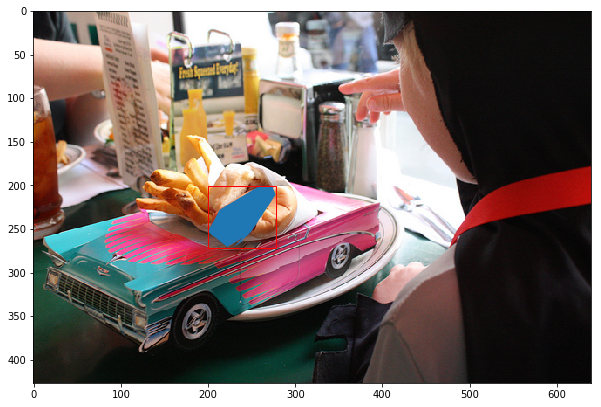

In [61]:
for image in images:
    if image['id'] == example['image_id']:
        im = io.imread('%s/images/%s/%s'%(dataDir,dataType,image['file_name']))
        fig,ax=plt.subplots(1)
        ax.imshow(im)
        rect = patches.Rectangle((example['bbox'][0],example['bbox'][1]),example['bbox'][2],example['bbox'][3],edgecolor='r',facecolor='none')
        poly = np.array(example['segmentation']).reshape((int(len(seg)/2),2))
        polygons = []
        polygons.append(Polygon(poly))
        p = PatchCollection(polygons)
        ax.add_collection(p)
        ax.add_patch(rect)
        plt.imshow(im)
        plt.show()